- abstract type: soil, pools, elements
- abstract type: parameters, soil and plant, 

In [1]:
## note1: qom_dom was put in flux!(DOM) and struct DOM 
using Plots
using UnPack

In [2]:
Base.@kwdef mutable struct SoilPar
    "parameters"
    fRa::Float64 = 0.2
    fINP::Float64 = 0.3
    vd_pomo::Float64   = 50.0
    vd_pomh::Float64   = 50.0
    vd_mom::Float64    = vd_pomh * 0.01
    ks_pomo::Float64   = 60.0
    fKM::Float64       = 10.0
    ks_pomh::Float64   = ks_pomo/fKM
    ks_mom::Float64    = ks_pomo * fKM
    Qmax::Float64      = 1.5
    Kba::Float64       = 6.0 
    Kdes::Float64      = 0.006 
    Kads::Float64      = Kdes * Kba    
    Kp2u::Float64      = 0.000005
    Ku2p::Float64      = 0.001
    rENZM::Float64     = 0.00012289
    rENZPo::Float64    = rENZM
    rENZPh::Float64    = rENZM
    pENZP::Float64     = 0.00147568
    fpEM::Float64      = 4.50361918
    pENZM::Float64     = pENZP * fpEM    
    frPOM2DOM::Float64 = 0.75
    frMB2DOM::Float64  = 0.5
    frMBA_to_POMo::Float64 = 0.1
    frMBA_to_POMh::Float64 = 0.9
    Vg::Float64        = 0.00425194
    alpha::Float64     = 0.05012233
    Vm::Float64        = Vg * alpha/(1.0 - alpha)
    KsDOM::Float64     = 0.00010034
    Yg::Float64        = 0.20109320 
    Ygsl::Float64      = 0.00520677
    CUE_slope::Float64 = -1.0*Ygsl
    Q10::Float64       = 1.8
    gamma::Float64     = 0.01030726
    rMORT::Float64     = min(0.99,Vm * gamma)
    beta::Float64      = 0.001
    VmD::Float64       = Vm * beta
    VmA2D::Float64     = Vm #* tp_scalar * wp_scalar_low
    VmD2A::Float64     = Vm #* tp_scalar * wp_scalar
    SWP_A2D::Float64   = 0.46
    tau::Float64       = 0.39
    SWP_D2A::Float64   = tau * SWP_A2D
    wdorm::Float64     = 3.38
    VNup_MB::Float64   = 0.1
    VNup_VG::Float64   = 0.00003296
    rNleach::Float64   = 0.02
    bNup_VG::Float64   = 0.5
    KsNH4_MB::Float64  = 0.00018
    KsNO3_MB::Float64  = 0.00041
    # YgN = sPAR%YgN        = phi 
    Qmax_NH4::Float64  = 0.0057442
    Kba_NH4::Float64   = 100.0
    KsNH4_VG::Float64  = 0.0012
    KsNO3_VG::Float64  = 0.0018
    fpENZN::Float64    = 1.0
    VNif::Float64      = 0.0635041
    VNit::Float64      = 185.28188371
    VDenit::Vector{Float64} = [0.86952628,0.86952628,0.86952628,0.86952628]
    # VDenit(1) = 0.86952628
    # VDenit(2) = 0.86952628
    # VDenit(3) = 0.86952628
    # VDenit(4) = 0.86952628
    KsNif::Float64 = 0.1
    KsNit::Float64 = 0.0012
    KsDenit::Vector{Float64} = [0.0018,0.0018,0.0018,0.0018]
    # KsDenit(1) = 0.0018
    # KsDenit(2) = 0.0018
    # KsDenit(3) = 0.0018
    # KsDenit(4) = 0.0018 
    
end

SoilPar

In [3]:
mutable struct Elements{FT<:AbstractFloat}
    c::FT
    n::FT
    p::FT 
end

struct Pools
    POMo::Elements
    POMh::Elements
    MOM ::Elements
    DOM ::Elements
    QOM ::Elements
    MBA ::Elements 
    MBD ::Elements
    EPO ::Elements 
    EPH ::Elements 
    EM  ::Elements 
end

mutable struct CPools{FT<:AbstractFloat}
    POMo::FT
    POMh::FT
    MOM ::FT
    DOM ::FT
    QOM ::FT
    MBA ::FT 
    MBD ::FT
    EPO ::FT 
    EPH ::FT 
    EM  ::FT 
end

mutable struct NPools{FT<:AbstractFloat}
    POMo::FT
    POMh::FT
    MOM ::FT
    DOM ::FT
    QOM ::FT
    MBA ::FT 
    MBD ::FT
    EPO ::FT 
    EPH ::FT 
    EM  ::FT 
end

mutable struct PPools{FT<:AbstractFloat}
    POMo::FT
    POMh::FT
    MOM ::FT
    DOM ::FT
    QOM ::FT
    MBA ::FT 
    MBD ::FT
    EPO ::FT 
    EPH ::FT 
    EM  ::FT 
end

mutable struct CNPools{FT<:AbstractFloat}
    POMo::FT
    POMh::FT
    MOM ::FT
    DOM ::FT
    QOM ::FT
    MBA ::FT 
    MBD ::FT
    EPO ::FT 
    EPH ::FT 
    EM  ::FT 
end



In [4]:
Base.@kwdef mutable struct Flux_POMo
    pomo_dom::Float64 = 0.0
    pomo_mom::Float64 = 0.0
end

Base.@kwdef mutable struct Flux_POMh
    pomh_dom::Float64 = 0.0
    pomh_mom::Float64 = 0.0
end

Base.@kwdef mutable struct Flux_MOM 
    mom_dom::Float64 = 0.0
end

Base.@kwdef mutable struct Flux_DOM 
    dom_mba::Float64 = 0.0
    dom_qom::Float64 = 0.0
    qom_dom::Float64 = 0.0
end


Base.@kwdef mutable struct Flux_MBA 
    co2_maintn::Float64 = 0.0
    co2_growth::Float64 = 0.0
    mba_pomh::Float64 = 0.0
    mba_pomo::Float64 = 0.0
    mba_dom::Float64 = 0.0
    mba_mbd::Float64 = 0.0
    mba_eph::Float64 = 0.0
    mba_epo::Float64 = 0.0
    mba_em::Float64 = 0.0
end

Base.@kwdef mutable struct Flux_MBD
    mbd_mba::Float64 = 0.0
    co2_maintn::Float64 = 0.0
end


Flux_MBD

In [5]:
##1 all Michaelis-Menten equations

function MM(par::SoilPar,pools::CPools,flux::Flux_POMo) 
    @unpack vd_pomo, ks_pomo  = par
    @unpack POMo, EPO = pools
    vm = vd_pomo   
    km = ks_pomo
    substrate = POMo
    enzyme = EPO 
        
    MM = vm * substrate * enzyme/(km + substrate)
    MM = min(MM, substrate)
    return MM
end

function MM(par::SoilPar,pools::CPools,flux::Flux_POMh) 
    @unpack vd_pomh, ks_pomh  = par
    @unpack POMh, EPH = pools
    vm = vd_pomh   
    km = ks_pomh
    substrate = POMh
    enzyme = EPH 
        
    MM = vm * substrate * enzyme/(km + substrate)
    MM = min(MM, substrate)
    return MM
end

function MM(par::SoilPar,pools::CPools,flux::Flux_MOM) 
    @unpack vd_mom, ks_mom  = par
    @unpack MOM, EM = pools
    vm = vd_mom   
    km = ks_mom
    substrate = MOM
    enzyme = EM 
        
    MM = vm * substrate * enzyme/(km + substrate)
    MM = min(MM, substrate)
    return MM
end

function MM(par::SoilPar,pools::CPools,flux::Flux_DOM) 
    @unpack Vg, Vm, Yg, KsDOM  = par
    @unpack DOM, MBA = pools
    vm = (Vg + Vm)/Yg    
    km = KsDOM
    substrate = DOM
    enzyme = MBA
        
    MM = vm * substrate * enzyme/(km + substrate)
    MM = min(MM, substrate)
    return MM
end

function MM(par::SoilPar,pools::CPools,flux::Flux_MBA) 
    @unpack Vg, Yg, KsDOM, Vm  = par
    @unpack MBA,DOM = pools
    enzyme    = MBA 
    substrate = DOM
    vm = Vg * (1.0/Yg - 1.0)   
    km = KsDOM
        
    MM_growth = vm * substrate * enzyme/(km + substrate)
    MM_growth = min(MM_growth, substrate)

    vm = Vm * (1.0/Yg - 1.0)
    MM_maintn = vm * substrate * enzyme/(km + substrate)
    MM_maintn = min(MM_maintn, substrate)
    return MM_growth, MM_maintn
end


MM (generic function with 5 methods)

In [6]:
##2 develop functions: Fluxes

function Flux!(par::SoilPar,pools::CPools,flux::Flux_POMo)
    @unpack frPOM2DOM = par
    pomo_dec = MM(par,pools,flux)
    pomo_dom = frPOM2DOM * pomo_dec
    pomo_mom = (1.0 - frPOM2DOM) * pomo_dec  

    flux.pomo_dom = pomo_dom
    flux.pomo_mom = pomo_mom 
    return pomo_dom,pomo_mom  
end

function Flux!(par::SoilPar,pools::CPools,flux::Flux_POMh)
    @unpack frPOM2DOM = par
    pomh_dec = MM(par,pools,flux)
    pomh_dom = frPOM2DOM * pomh_dec
    pomh_mom = (1.0 - frPOM2DOM) * pomh_dec 

    flux.pomh_dom = pomh_dom
    flux.pomh_mom = pomh_mom 
    return pomh_dom,pomh_mom  
end

function Flux!(par::SoilPar,pools::CPools,flux::Flux_MOM)
    mom_dec      = MM(par,pools,flux)
    mom_dom      = mom_dec

    flux.mom_dom = mom_dom
    return mom_dom 
end

function Flux!(par::SoilPar,pools::CPools,flux::Flux_DOM)
    @unpack DOM,QOM = pools 
    @unpack Kads,Qmax,Kdes = par
    dom_dec = MM(par,pools,flux)
    dom_mba = dom_dec 
    
    # ========================
    # ads,des = AdsDesorption(par,pools) 
    _DOM = DOM - dom_mba # the preference given to microbial uptake then ad_de
    adsorbate = _DOM
    adsorbent = QOM
    ads = Kads * adsorbate * (1.0 - adsorbent/Qmax)
    des = Kdes * adsorbent / Qmax
    if des > (adsorbent + ads)
        des = adsorbent + ads 
    elseif ads > adsorbate + des 
        ads = adsorbate + des
    end 
    # ========================
    dom_qom = ads  
    qom_dom = des

    flux.dom_mba = dom_mba
    flux.dom_qom = dom_qom
    flux.qom_dom = qom_dom
    return dom_mba, dom_qom, qom_dom 
end

function Flux!(par::SoilPar,pools::CPools,flux::Flux_MBA)
    @unpack rMORT, frMB2DOM, frMBA_to_POMh, frMBA_to_POMo, KsDOM, VmA2D = par
    @unpack MBA,DOM = pools 
    mb = MBA
    mba_mortality= rMORT * mb
    mba_dom   = frMB2DOM * mba_mortality
    mba_pomh   = (1.0 - frMB2DOM) * mba_mortality * frMBA_to_POMh
    mba_pomo   = (1.0 - frMB2DOM) * mba_mortality * frMBA_to_POMo
    
    phi = DOM/(DOM + KsDOM)
    mba_mbd = (1.0 - phi) * VmA2D * mb
    mba_CO2_growth, mba_CO2_maintn = MM(par,pools,flux) # Respiration of MBA

    flux.mba_dom        = mba_dom
    flux.mba_pomo       = mba_pomo
    flux.mba_pomh       = mba_pomh
    flux.mba_mbd        = mba_mbd
    flux.co2_growth = mba_CO2_growth
    flux.co2_maintn = mba_CO2_maintn
    return mba_mortality,mba_dom,mba_pomo,mba_pomh,mba_mbd,mba_CO2_growth,mba_CO2_maintn
end

function Flux!(par::SoilPar,pools::CPools,flux::Flux_MBD) # Respiration of MBD and resurcitaion
    @unpack KsDOM,VmD2A,VmD = par
    @unpack DOM,MBD = pools
    phi = DOM/(DOM + KsDOM)
    mbd_mba = phi * VmD2A * MBD
    mbd_CO2_maintn = VmD * MBD 

    flux.mbd_mba        = mbd_mba
    flux.co2_maintn = mbd_CO2_maintn
    return mbd_mba, mbd_CO2_maintn
end




Flux! (generic function with 6 methods)

In [7]:
# ##2 develop functions: Fluxes
"""
alternative structure to Flux! where flux.xx is used!
"""

# function Flux(par::SoilPar,pools::CPools,flux::Flux_POMo)
#     @unpack frPOM2DOM = par
#     pomo_dec = MM(par,pools,flux)
#     pomo_dom = frPOM2DOM * pomo_dec
#     pomo_mom = (1.0 - frPOM2DOM) * pomo_dec  

#     return pomo_dom,pomo_mom  
# end

# function Flux(par::SoilPar,pools::CPools,flux::Flux_POMh)
#     @unpack frPOM2DOM = par
#     pomh_dec = MM(par,pools,flux)
#     pomh_dom = frPOM2DOM * pomh_dec
#     pomh_mom = (1.0 - frPOM2DOM) * pomh_dec 

#     return pomh_dom,pomh_mom  
# end

# # function Flux(par::SoilPar,pools::CPools,flux::Flux_MOM)
# #     mom_dec      = MM(par,pools,flux)
# #     mom_dom      = mom_dec

# #     return mom_dom 
# # end

# function Flux(par::SoilPar,pools::CPools,flux::Flux_DOM)
#     @unpack DOM,QOM = pools 
#     dom_dec = MM(par,pools,flux)
#     dom_mba = dom_dec 
#     _DOM = DOM - dom_mba # the preference given to microbial uptake then ad_de
#     pools.DOM = _DOM 
#     ads,des = AdsDesorption(par,pools)
#     dom_qom = ads  
#     qom_dom = des
#     pools.DOM = DOM # change the dom back to initial for soil carbon calculation later

#     return dom_mba, dom_qom, qom_dom 
# end

# function Flux(par::SoilPar,pools::CPools,flux::Flux_MBA)
#     @unpack rMORT, frMB2DOM, frMBA_to_POMh, frMBA_to_POMo, KsDOM, VmA2D = par
#     @unpack MBA,DOM = pools 
#     mb = MBA
#     mba_mortality= rMORT * mb
#     mba_dom   = frMB2DOM * mba_mortality
#     mba_pomh   = (1.0 - frMB2DOM) * mba_mortality * frMBA_to_POMh
#     mba_pomo   = (1.0 - frMB2DOM) * mba_mortality * frMBA_to_POMo
    
#     phi = DOM/(DOM + KsDOM)
#     mba_mbd = (1.0 - phi) * VmA2D * mb
#     mba_CO2_growth, mba_CO2_maintn = MM(par,pools,flux) # Respiration of MBA

#     return mba_mortality,mba_dom,mba_pomo,mba_pomh,mba_mbd,mba_CO2_growth,mba_CO2_maintn
# end

# function Flux(par::SoilPar,pools::CPools,flux::Flux_MBD) # Respiration of MBD and resurcitaion
#     @unpack KsDOM,VmD2A,VmD = par
#     @unpack DOM,MBD = pools
#     phi = DOM/(DOM + KsDOM)
#     mbd_mba = phi * VmD2A * MBD
#     mbd_CO2_maintn = VmD * MBD 
#     return mbd_mba, mbd_CO2_maintn
# end



"alternative structure to Flux! where flux.xx is used!\n"

In [8]:
## 3 developing functions: enzymes

function EnzymeProduction(par::SoilPar,pools::CPools)
    @unpack pENZP, Vm, pENZM = par
    @unpack MBA,POMo,POMh = pools 
    
    frPOMh = POMh/(POMh + POMo)
    mba_enzph = frPOMh * pENZP * Vm * MBA
    mba_enzpo = (1-frPOMh) * pENZP * Vm * MBA
    mba_enzm =  pENZM * Vm * MBA
    return mba_enzph, mba_enzpo, mba_enzm 
end 

function EnzymeTurnover(par::SoilPar,pools::CPools)
    epo_dom = par.rENZPo * pools.EPO
    eph_dom = par.rENZPh * pools.EPH
    em_dom  = par.rENZM * pools.EM
    return epo_dom,eph_dom,em_dom
end


EnzymeTurnover (generic function with 1 method)

In [9]:
function CPools!(par::SoilPar,pools::CPools)
    @unpack POMo,POMh,MOM,DOM,QOM,MBA,MBD,EPO,EPH,EM = pools
    # @unpack EPO,EPH,EM = pools

    pomo_dec = MM(par,pools,flux_pomo); pomh_dec = MM(par,pools,flux_pomh);
    mom_dec = MM(par,pools,flux_mom); dom_dec = MM(par,pools,flux_dom);

    pomo_dom,pomo_mom = Flux!(par,pools,flux_pomo)
    pomh_dom,pomh_mom = Flux!(par,pools,flux_pomh)
    dom_mba, dom_qom, qom_dom = Flux!(par,pools,flux_dom)
    
    mba_mortality, mba_dom, mba_pomo, mba_pomh,
    mba_mbd, mba_CO2_growth, mba_CO2_maintn = 
    Flux!(par,pools,flux_mba);

    mbd_mba, mbd_CO2_maintn = Flux!(par,pools,flux_mbd)

    epo_dom,eph_dom,em_dom = EnzymeTurnover(par,pools)

    mba_eph, mba_epo, mba_em = EnzymeProduction(par,pools)

    pools.POMo = POMo - pomo_dec + mba_pomo + litter_pomo
    pools.POMh = POMh - pomh_dec + mba_pomh + litter_pomh
    pools.MOM = MOM - mom_dec + pomo_mom + pomh_mom 
    pools.DOM = (DOM - dom_dec - dom_qom + qom_dom + litter_dom + pomh_dom 
                + pomo_dom + mba_dom + epo_dom + eph_dom + em_dom)
    pools.QOM = QOM - qom_dom + dom_qom

    pools.MBA = (MBA - mba_mortality - mba_mbd - mba_CO2_growth 
                - mba_CO2_maintn + dom_mba + mbd_mba
                - mba_eph - mba_epo - mba_em)

    pools.MBD = MBD - mbd_mba - mbd_CO2_maintn + mba_mbd

    pools.EPO = EPO + mba_epo - epo_dom
    pools.EPH = EPH + mba_eph - eph_dom
    pools.EM = EM + mba_em - em_dom
    
    return nothing 
end

CPools! (generic function with 1 method)

In [10]:
## Initialize the model

## parameterization
par = SoilPar();

# flux initilization (default values are 0s)
flux_pomo = Flux_POMo();flux_pomh = Flux_POMh();
flux_mom = Flux_MOM(); 
flux_dom = Flux_DOM(); # note: qom is wrapped in dom
flux_mba = Flux_MBA(); flux_mbd = Flux_MBD();

# parameters to be added 
LF0 = 0.1
r0 = 0.01
fQOM = 0.05

# initial carbon pool
soc = 1.578 # mg/cm3 
poc = 0.377; poc_o = poc * LF0; poc_h = poc * (1.0 - LF0); 
moc = 1.064;qoc = moc * fQOM; 
doc = 0.137;
mbc = 0.033; mbc_a = mbc * r0; mbc_d = mbc * (1.0 - r0);
epo = 6.0e-5
eph = 6.0e-5
em  = 6.0e-5

# _CPools = CPools(10000.,10000.,2000.,200.,120.,100.,150.,0.1,0.1,0.1)
CPools1 = CPools(poc_o,poc_h,moc,doc,qoc,mbc_a,mbc_d,epo,eph,em)
pools = CPools1

## carbon input
# litter_pomo = 100000.0/365.0/24.0 * 0.5
# litter_pomh = 100000.0/365.0/24.0 * 0.25
# litter_dom = 100000.0/365.0/24.0 * 0.25

SIN_day_str = readlines("./test/SIN_day.dat") # unit: mgC-cm2-d

SIN_day = parse.(Float64, SIN_day_str) # string to numeric

SIN_day = SIN_day[3:end]

SIN_hour = SIN_day ./24

SIN_input = SIN_hour .* par.fINP;

depth = 100.0 # cm

# 0.07, 0.37, 0.56 # fraction type I
f_l_pomo = 0.07 # to be added to parameter list 
f_l_pomh = 0.37 # to be added to parameter list
f_l_dom = 0.56 # to be added to parameter list
litter_pomo_array = SIN_input .* f_l_pomo/depth;
litter_pomh_array = SIN_input .* f_l_pomh/depth;
litter_dom_array  = SIN_input .* f_l_dom/depth; 



In [11]:
## model run

record_POMh = [poc_h]
record_POMo = [poc_o]
record_MOM = [moc]
record_MBD = [mbc_d]
record_MBA = [mbc_a]
record_QOM = [qoc]
record_DOM = [doc]

# litter_pomo_record = []
# litter_pomh_record = []
# litter_dom_record = []

pomo_dec_record = []
pomh_dec_record = []
mom_dec_record = []
dom_dec_record = []

for iday = 1:365*10
    for ihour = 1:24
        global litter_pomo = litter_pomo_array[iday]
        global litter_pomh = litter_pomh_array[iday]
        global litter_dom = litter_dom_array[iday]

        # ========================
        # pomo_dec = MM_pomo(par,CPools1); pomh_dec = MM_pomh(par,CPools1);
        # mom_dec = MM_mom(par,CPools1); dom_dec = MM_dom(par,CPools1);

        # push!(pomo_dec_record,pomo_dec)
        # push!(pomh_dec_record,pomh_dec)
        # push!(mom_dec_record,mom_dec)
        # push!(dom_dec_record,dom_dec)
        
        CPools!(par,CPools1)
        # CPoolsy!(par,pools)
    end
    push!(record_POMo,CPools1.POMo)
    push!(record_POMh,CPools1.POMh)
    push!(record_MOM,CPools1.MOM)
    push!(record_QOM,CPools1.QOM)
    push!(record_DOM,CPools1.DOM)

    push!(record_MBD,CPools1.MBD)
    push!(record_MBA,CPools1.MBA)

    # push!(litter_pomo_record,litter_pomo)
    # push!(litter_pomh_record,litter_pomh)
    # push!(litter_dom_record,litter_dom)
end 



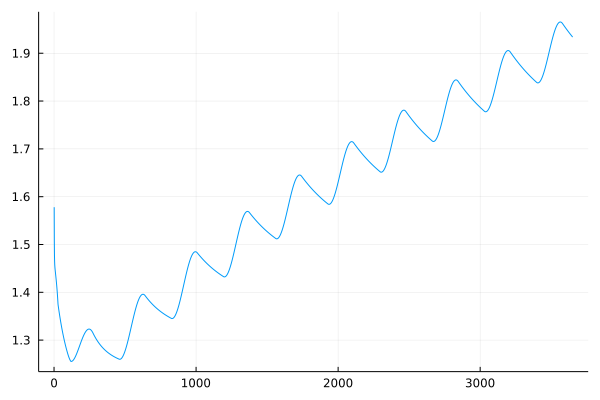

In [14]:
## plots
soc_total = record_POMo + record_POMh + record_MOM + record_DOM 
x=1:length(record_POMo); y = soc_total[1:end] 
plot(x[1:end], y,label=false)
# savefig("test4_soc_CPools.png")

In [ ]:
# function CPools!(par::SoilPar,pools::CPools,flux::)
#     @unpack POMo,POMh,MOM,DOM,QOM,MBA,MBD = pools
#     @unpack EPO,EPH,EM = pools

#     # par::SoilPar,pools::CPools,flux::POMo
#     pomo_dec = MM(par,pools,flux::POMo); pomh_dec = MM_pomh(par,pools);
#     mom_dec = MM_mom(par,pools); dom_dec = MM_dom(par,pools);

#     pomo_dom,pomo_mom = Flux_pomo(par,pools)
#     pomh_dom,pomh_mom = Flux_pomh(par,pools)
#     dom_mba, dom_qom, qom_dom = Flux_dqom(par,pools)
    
#     mba_mortality, mba_dom, mba_pomo, mba_pomh,
#     mba_mbd, mba_CO2_growth, mba_CO2_maintn = 
#     Flux_mba(par,pools);

#     mbd_mba, mbd_CO2_maintn = Flux_mbd(par,pools)

#     epo_dom,eph_dom,em_dom = EnzymeTurnover(par,pools)

#     mba_eph, mba_epo, mba_em = EnzymeProduction(par,pools)

#     pools.POMo = POMo - pomo_dec + mba_pomo + litter_pomo
#     pools.POMh = POMh - pomh_dec + mba_pomh + litter_pomh
#     pools.MOM = MOM - mom_dec + pomo_mom + pomh_mom 
#     pools.DOM = (DOM - dom_dec + qom_dom + litter_dom + pomh_dom 
#                 + pomo_dom + mba_dom + epo_dom + eph_dom + em_dom)
#     pools.QOM = QOM - qom_dom + dom_qom

#     pools.MBA = (MBA - mba_mortality - mba_mbd - mba_CO2_growth 
#                 - mba_CO2_maintn + dom_mba + mbd_mba
#                 - mba_eph - mba_epo - mba_em)

#     pools.MBD = MBD - mbd_mba - mbd_CO2_maintn + mba_mbd

#     pools.EPO = EPO + mba_epo - epo_dom
#     pools.EPH = EPH + mba_eph - eph_dom
#     pools.EM = EM + mba_em - em_dom
    
#     return nothing 
# end

In [ ]:
a = [1,2]
b = 3
function ttt()
    a[2]=200
    b = 5
    return b
end

b = ttt()
println(a)
println(b)


In [ ]:
function test(a,b)
    c = a+b+d 
    return c
end 

d = 5

test(2,3)


In [ ]:
## Initialize the model
soc = 1.578 # mg/cm3 
poc = 0.377 
moc = 1.064
doc = 0.137
mbc = 0.033
epo = 6.0e-5
eph = 6.0e-5
em  = 6.0e-5
fQOM = 0.05

CPools1 = CPools(10000.,10000.,2000.,200.,120.,100.,150.,0.1,0.1,0.1)

## carbon input
litter_pomo = 100000.0/365.0/24.0 * 0.5
litter_pomh = 100000.0/365.0/24.0 * 0.25
litter_dom = 100000.0/365.0/24.0 * 0.25

## parameterization
par = SoilPar();

In [ ]:
for iday = 1:10
    for ihour = 1:24
        CPools!(par,CPools1)
    end
end 

In [ ]:
CPools1

In [ ]:
CPools1

In [ ]:

using Plots
 
x = [i for i = 1:100]
y = x
 
anim = @animate for i = 1:length(x)
    scatter!([x[i]], [y[i]], legend=false)
end
 
gif(anim, "tutorial_anim_fps100.gif", fps = 30)